In [37]:
import numpy as np 
import scipy 
import imageio 
import matplotlib.pyplot as plt 
import skimage  #install scikit-image 
import warnings 
warnings.filterwarnings("ignore")

In [38]:
from skimage import data 

In [39]:
#Creating a numpy array from an image file: 
#Lets choose a WIFIRE satellite image file as an ndarray and display its type 
photo_data = imageio.imread('sd-3layers.jpg') 

In [40]:
type(photo_data) 

numpy.ndarray

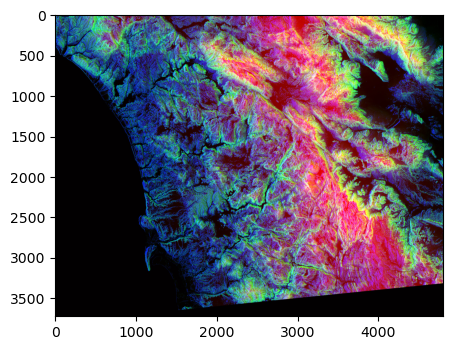

In [41]:
#Let us see what is in this image.
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show() 

In [42]:
#Let us see how does the photo_data looks like: 
photo_data

array([[[  0,  22,  35],
        [  0,  11,  57],
        [ 19,  32, 128],
        ...,
        [ 19,  21,  98],
        [  0,   6,  28],
        [  0,  19,   0]],

       [[ 30,  64, 109],
        [ 29,  46, 128],
        [ 25,  33, 157],
        ...,
        [  1,   5,  50],
        [  0,   5,  34],
        [  0,   4,  28]],

       [[ 23,  57, 155],
        [ 16,  35, 174],
        [ 15,  24, 189],
        ...,
        [  0,   5,   9],
        [  0,   5,  34],
        [  0,   2,  69]],

       ...,

       [[  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]]

In [43]:
photo_data.shape

(3725, 4797, 3)

In [44]:
#The shape of the ndarray show that it is a three layered matrix. 
# The first two numbers here are length and width, and 
# the third number (i.e. 3) is for three layers: Red, Green and Blue. 
 
#RGB Color Mapping in the Photo: 
#RED pixel indicates Altitude 
#BLUE pixel indicates Aspect 
#GREEN pixel indicates Slope 
#The higher values denote higher altitude, aspect and slope. 

In [45]:
photo_data.size # Data Size 


53606475

In [46]:
photo_data.min(), photo_data.max() # Maximum and Minimum of the pixel Value 


(0, 255)

In [47]:
photo_data.mean()

75.8299354508947

In [48]:
#Pixel on the 150th Row and 250th Column: 
photo_data[150, 250] # It will print the Red, Green , Blue Value in order 

array([ 17,  35, 255], dtype=uint8)

In [49]:
photo_data[150, 250, 1] # It will print out the Green Value

35

In [50]:
#Pixel on the 2nd Row and 2nd Column: 
photo_data[1, 1] # It will print the Red, Green, Blue Value in order 


array([ 29,  46, 128], dtype=uint8)

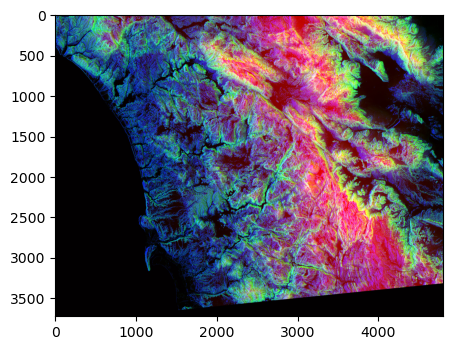

In [51]:
#Set a Pixel to All Zeros 
#We can set all three layer in a pixel as once by assigning zero globally to that 
# (row,column) pairing. However, setting one pixel to zero is not noticeable.
photo_data = imageio.imread('sd-3layers.jpg') 
photo_data[150, 250] = 0 # We set all three layers of RGB of this 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show()

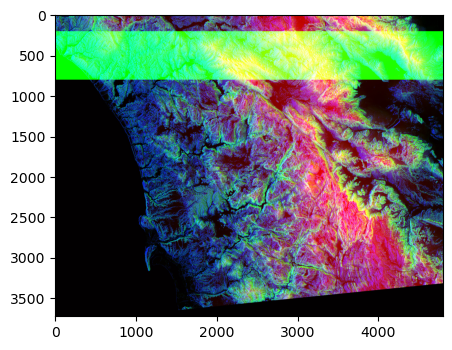

In [52]:
#We can also use a range to change the pixel values. As an example, 
# let us set the green layer for rows 200 to 800 to full intensity. 
#We will set the value of Green layer to full intensity for rows 200 (inclusive) 
# to 800 (exclusive) for all the columns. 
photo_data = imageio.imread('sd-3layers.jpg') 
photo_data[200:800, : ,1] = 255 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show()

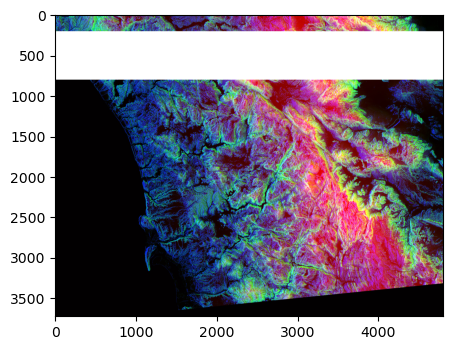

In [53]:
#We will set the value of Red, Green and Blue layer to full intensity 
# (we will get a white block) for rows 200 (inclusive) to 800 (exclusive) for all the columns. 
photo_data = imageio.imread('sd-3layers.jpg') 
photo_data[200:800, :] = 255 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show() 

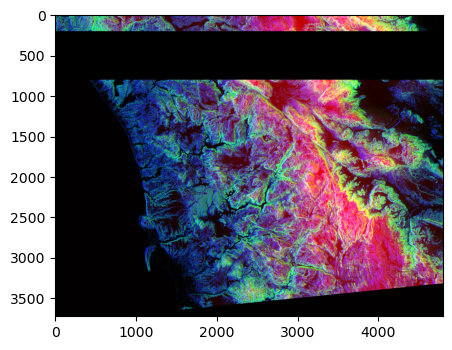

In [54]:
#We will set the value of Red, Green and Blue layer to least intensity 
# (we will get a black block) for rows 200 (inclusive) to 800 (exclusive) for all the columns. 
photo_data = imageio.imread('sd-3layers.jpg') 
photo_data[200:800, :] = 0 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show() 

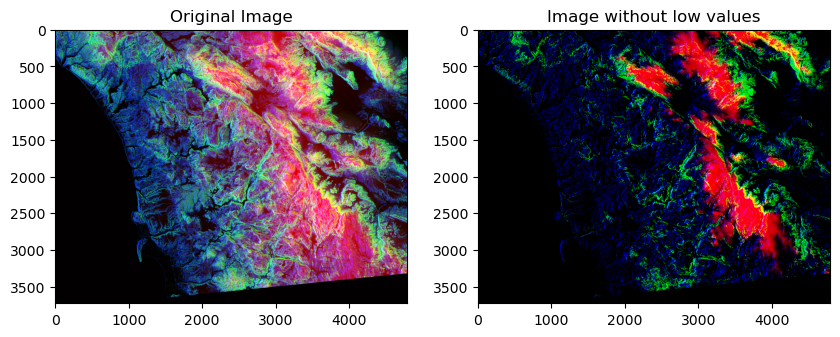

In [65]:
photo_data = imageio.imread('sd-3layers.jpg')

# Display the original image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Create subplot 1
plt.imshow(photo_data)
plt.title('Original Image')

# Filter out low pixel values
low_value_filter = photo_data < 200
photo_data_filtered = photo_data.copy()  # Create a copy to preserve the original data
photo_data_filtered[low_value_filter] = 0

# Display the modified image
plt.subplot(1, 2, 2)  # Create subplot 2
plt.imshow(photo_data_filtered)
plt.title('Image without low values')

plt.show()

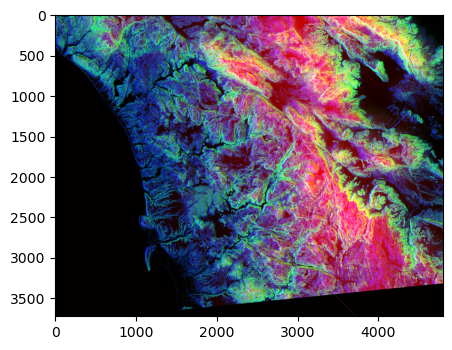

In [79]:
rows_range = np.arange(len(photo_data)) #Create a range array 
 
cols_range = rows_range #Create a range array 

 
#We are setting the selected rows and columns to the maximum value of 255 
photo_data[rows_range, cols_range] = 254  
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data, cmap='gray') 
plt.show() 

In [80]:
#We see a diagonal white line that is a result of our operation. 

In [81]:
#Masking Images 
#Now let us try to mask the image in shape of a circular disc. 

In [82]:
total_rows, total_cols, total_layers = photo_data.shape 
print("photo_data = ", photo_data.shape) 

photo_data =  (3725, 4797, 3)


In [83]:
X, Y = np.ogrid[:total_rows, :total_cols] 
print("X = ", X.shape, " and Y = ", Y.shape)

X =  (3725, 1)  and Y =  (1, 4797)


In [84]:
from IPython.display import Image 
Image("Images/figure.png") 
center_row, center_col = total_rows / 2, total_cols / 2 
print("center_row = ", center_row, "AND center_col = ", center_col)

center_row =  1862.5 AND center_col =  2398.5


In [86]:
dist_from_center = (X - center_row)**2 + (Y - center_col)**2 
radius = (total_rows / 2)**2 
circular_mask = (dist_from_center > radius) 

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


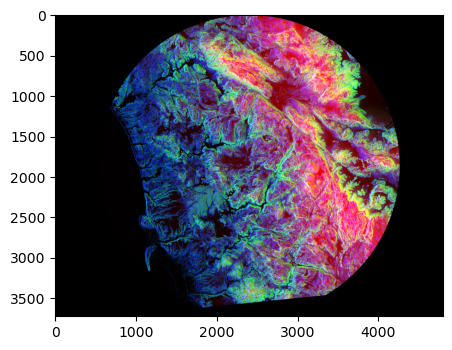

In [88]:
print(circular_mask[1500:1700,2000:2200]) 
photo_data = imageio.imread('sd-3layers.jpg') 
photo_data[circular_mask] = 0 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 

In [89]:
#Further Masking 
#We can further improve the mask, for example just get upper half disc. 

In [90]:
X, Y = np.ogrid[:total_rows, :total_cols] 
half_upper = X < center_row # this line generates a mask for all rows above the center 

In [91]:
half_upper_mask = np.logical_and(half_upper, circular_mask) 
photo_data = imageio.imread('sd-3layers.jpg') 
photo_data[half_upper_mask] = 255 

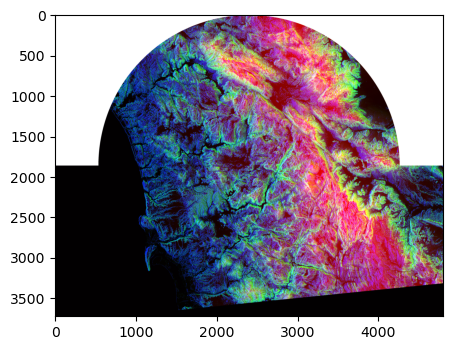

In [93]:
#photo_data[half_upper_mask] = random.randint(200,255) 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show() 

In [94]:
# Further Processing of our Satellite Imagery 
# * Processing of RED Pixels 
# * Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will 
# do this by detecting high intensity RED Pixels and muting down other areas. 

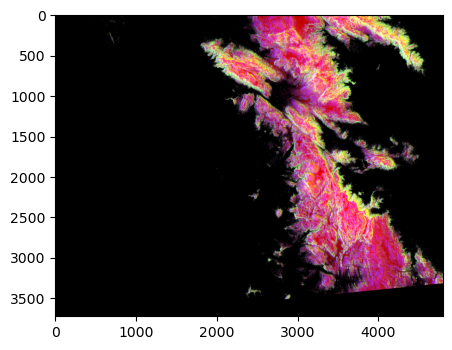

In [96]:
photo_data = imageio.imread('sd-3layers.jpg') 
red_mask   = photo_data[:, : ,0] < 150 
photo_data[red_mask] = 0 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show()

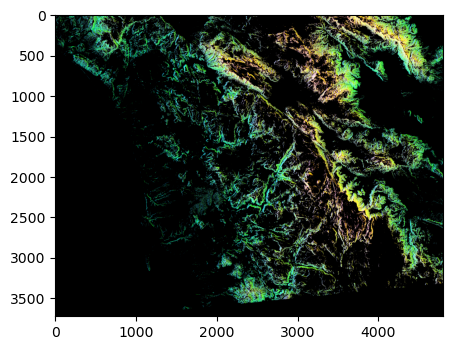

In [99]:
# Detecting Highl-GREEN Pixels 
photo_data = imageio.imread('sd-3layers.jpg') 
green_mask = photo_data[:, : ,1] < 150 
photo_data[green_mask] = 0 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show()

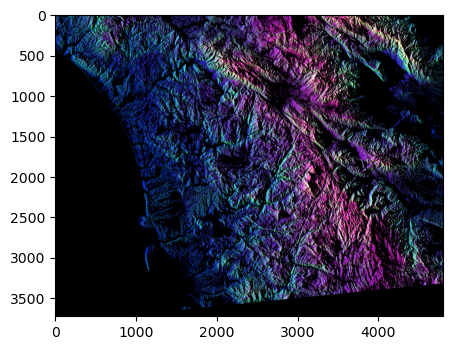

In [100]:
#Detecting Highly-BLUE Pixels 
photo_data = imageio.imread('sd-3layers.jpg') 
blue_mask  = photo_data[:, : ,2] < 150 
photo_data[blue_mask] = 0 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show() 

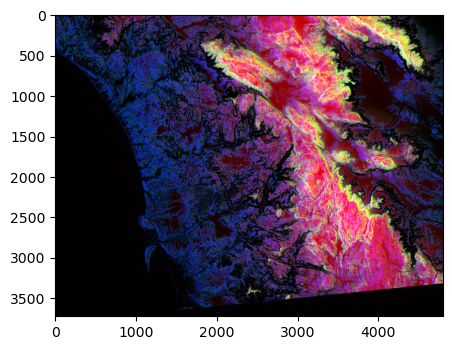

In [101]:
#Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE 
photo_data = imageio.imread('sd-3layers.jpg') 
red_mask   = photo_data[:, : ,0] < 150 
green_mask = photo_data[:, : ,1] > 100 
blue_mask  = photo_data[:, : ,2] < 100 
final_mask = np.logical_and(red_mask, green_mask, blue_mask) 
photo_data[final_mask] = 0 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show() 